In [135]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
from time import time
import os
from PIL import Image
from sklearn.model_selection import train_test_split
from tensorflow.python import keras
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from tensorflow.python.keras.layers.advanced_activations import LeakyReLU
from tensorflow.python.keras.preprocessing.image import ImageDataGenerator
from tensorflow.python.keras.utils import to_categorical
from tensorflow.python.keras.callbacks import TensorBoard
pd.options.display.max_columns = 150
pd.options.display.max_rows = 150
%matplotlib inline

Next I want to tell the program where I have saved the data, and where I want it to save the processed images

In [13]:
processed_pics = 'data/processed_pics'
pic_size = 256, 256

You don't have to run this next cell every time when building - it's time consuming

Resize all the images, make them black and white, save them all as '.png'

In [23]:
listing = os.listdir('data/raw')
num_samples = size(listing)
print("Number of images in folder:", num_samples)
for file in listing:
    if (file.endswith('.png')): #weird files keep appearing in this folder
        im = Image.open('data/raw/' + file)
        img = im.resize(pic_size)
        gray = img.convert('L')
        #Maybe don't run this line every time when building....as it's quite slow
        gray.save(processed_pics + '/' + file, "png")

Number of images in folder: 393


This is our prize - a list of processed images

In [25]:
imlist = os.listdir(processed_pics)
imlist

['Hand 11.png',
 'Finger 7.png',
 'Ankle AP 5.png',
 'Elbow 12 c.png',
 'Wrist 14.png',
 'Elbow 3.png',
 'Finger 20.png',
 'Foot 10 l.png',
 'Knee AP 22.png',
 'Wrist 3.png',
 'Shoulder 5.png',
 'Elbow 12.png',
 'Foot 8.png',
 'Foot 9.png',
 'Elbow 13.png',
 'Shoulder 4.png',
 'Wrist 2.png',
 'Knee AP 23.png',
 'Foot 10 m.png',
 'Finger 21.png',
 'Forearm 4 a.png',
 'Elbow 2.png',
 'Wrist 15.png',
 'Elbow 12 b.png',
 'Ankle AP 4.png',
 'Finger 6.png',
 'Hand 10.png',
 'Hand 12.png',
 'Knee Lat 9.png',
 'Finger 4.png',
 'Ankle AP 6.png',
 'Forearm 4 c.png',
 'Forearm 19.png',
 'Foot 10 o.png',
 'Knee AP 21.png',
 'Finger 23.png',
 'Ankle AP 18.png',
 'Ankle Lat 18.png',
 'Elbow 11.png',
 'Shoulder 6.png',
 'Shoulder 7.png',
 'Elbow 10.png',
 'Wrist 1.png',
 'Ankle Lat 19.png',
 'Ankle AP 19.png',
 'Finger 22.png',
 'Forearm 24.png',
 'Knee AP 20.png',
 'Foot 10 n.png',
 'Forearm 18.png',
 'Forearm 4 b.png',
 'Elbow 12 a.png',
 'Elbow 1.png',
 'Wrist 16.png',
 'Ankle AP 7.png',
 'Finger 

Lets try to view some of these images...

Lets choose an image and print it:

[[0.         0.         0.28235295 ... 0.         0.         0.        ]
 [0.         0.         0.2784314  ... 0.         0.         0.        ]
 [0.         0.         0.28235295 ... 0.18039216 0.2        0.22352941]
 ...
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]]
(256, 256)


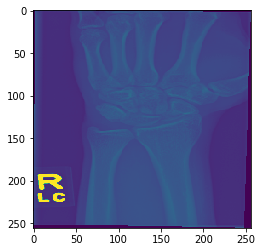

In [31]:
#Like this:
image = mpimg.imread(processed_pics + '/Wrist 13.png')
imgplot = plt.imshow(image)
print(image)
print(image.shape)

Next we create a dictionary where the keys are the filenames, and the values are the processed images flattened into arrays

In [34]:
image_dict = {}
print("Image dictionary:")
for im2 in imlist:
    if im2.endswith('.png'):
        img_as_flat_array = np.array(Image.open(processed_pics + '/' + im2))
        img_as_flat_array = img_as_flat_array.flatten()
        img_as_flat_array = img_as_flat_array.astype(int)
        image_dict.update({im2 : img_as_flat_array})
print(image_dict)

Image dictionary:
{'Hand 11.png': array([105, 102,  84, ...,  61,  63,  64]), 'Finger 7.png': array([0, 0, 0, ..., 0, 0, 0]), 'Ankle AP 5.png': array([0, 0, 0, ..., 0, 0, 0]), 'Elbow 12 c.png': array([ 8,  8, 10, ..., 47, 47, 47]), 'Wrist 14.png': array([ 99, 100, 102, ..., 132, 110, 105]), 'Elbow 3.png': array([ 0,  0,  0, ..., 63, 63, 63]), 'Finger 20.png': array([105, 105, 105, ..., 104, 104,   0]), 'Foot 10 l.png': array([25, 25, 25, ..., 85, 85, 85]), 'Knee AP 22.png': array([17, 15, 15, ...,  2,  2,  2]), 'Wrist 3.png': array([ 91,  94, 101, ..., 120, 104,  98]), 'Shoulder 5.png': array([11, 11, 11, ..., 11, 10, 12]), 'Elbow 12.png': array([37, 33, 33, ..., 34, 27, 34]), 'Foot 8.png': array([0, 0, 0, ..., 0, 0, 0]), 'Foot 9.png': array([0, 0, 0, ..., 0, 0, 0]), 'Elbow 13.png': array([0, 0, 0, ..., 0, 0, 0]), 'Shoulder 4.png': array([0, 0, 0, ..., 0, 0, 0]), 'Wrist 2.png': array([4, 4, 4, ..., 3, 4, 4]), 'Knee AP 23.png': array([12, 12, 12, ..., 12, 12, 12]), 'Foot 10 m.png': arra

For this workbook, I want a dictionary of the filenames (keys) and a y-label with a single number - whether the humerous is present or not

In [49]:
xray_labels.shape

(391, 140)

In [53]:
xray_labels = pd.read_csv('data/y_labels_binary.csv')

#Lets ensure consistency with our filename endings:
for i in range(len(xray_labels.index)):
    xr_name = str(xray_labels.iloc[i,0])
    if xr_name[-4:] != '.png':
        nn = xr_name+'.png'
        xray_labels.replace(xr_name, nn, inplace=True)
xray_labels.sample(3)

,x-ray,Distal phalanx of 1st digit of hand,Proximal phalanx of 1st digit of hand,Sesamoid bones of hand,Metacarpal of 1st digit,Distal phalanx of 2nd digit of hand,Intermediate phalanx of 2nd digit of hand,Proximal phalanx of 2nd digit of hand,Metacarpal of 2nd digit,Distal phalanx of 3rd digit of hand,Intermediate phalanx of 3rd digit of hand,Proximal phalanx of 3rd digit of hand,Metacarpal of 3rd digit,Distal phalanx of 4th digit of hand,Intermediate phalanx of 4th digit of hand,Proximal phalanx of 4th digit of hand,Metacarpal of 4th digit,Distal phalanx of 5th digit of hand,Intermediate phalanx of 5th digit of hand,Proximal phalanx of 5th digit of hand,Metacarpal of 5th digit,Trapezium carpel,Trapezoid carpel,Capitate carpel,Hamate carpel,Triquetral carpel,Pisiform carpel,Lunate carpel,Scaphoid carpel,Radius,Ulna,Humerus,Scapula,Clavicle,Distal phalanx of 1st digit of foot,Proximal phalanx of 1st digit of foot,Sesamoid bones of foot,Metatarsal of 1st digit of foot,Distal phalanx of 2nd digit of foot,Intermediate phalanx of 2nd digit of foot,Proximal phalanx of 2nd digit of foot,Metatarsal of 2nd digit of foot,Distal phalanx of 3rd digit of foot,Intermediate phalanx of 3rd digit of foot,Proximal phalanx of 3rd digit of foot,Metatarsal of 3rd digit of foot,Distal phalanx of 4th digit of foot,Intermediate phalanx of 4th digit of foot,Proximal phalanx of 4th digit of foot,Metatarsal of 4th digit of foot,Distal phalanx of 5th digit of foot,Intermediate phalanx of 5th digit of foot,Proximal phalanx of 5th digit of foot,Metatarsal of 5th digit of foot,Medial cuneiform tarsal,Intermediate cuneiform tarsal,Lateral cuneiform tarsal,Cuboid tarsal,Calcaneus tarsal,Talus tarsal,Navicular tarsal,Tibia,Fibula,Patella,Femur,Ilium,Pubis,Ischium,Sacrum,Coccyx,Lumbar vertebra L5,Lumbar vertebra L4,Lumbar vertebra L3,Lumbar vertebra L2,Lumbar vertebra L1,Thoracic vertebra T12,Thoracic vertebra T11,Thoracic vertebra T10,Thoracic vertebra T9,Thoracic vertebra T8,Thoracic vertebra T7,Thoracic vertebra T6,Thoracic vertebra T5,Thoracic vertebra T4,Thoracic vertebra T3,Thoracic vertebra T2,Thoracic vertebra T1,Cervical vertebra C7,Cervical vertebra C6,Cervical vertebra C5,Cervical vertebra C4,Cervical vertebra C3,Axis (Cervical vertebra C2),Atlas (Cervical vertebra C1),12th rib,11th rib,10th rib,9th rib,8th rib,7th rib,6th rib,5th rib,4th rib,3rd rib,2nd rib,1st rib,Xiphoid process of sternum,Body of sternum,Manubrium of sternum,Hyoid,Mandible,Mandibular central incisor,Mandibular lateral incisor,Mandibular canine,Mandibular 1st premolar,Mandibular 2nd premolar,Mandibular 1st molar,Mandibular 2nd molar,Mandibular 3rd molar,Maxillary central incisor,Maxillary lateral incisor,Maxillary canine,Maxillary 1st premolar,Maxillary 2nd premolar,Maxillary 1st molar,Maxillary 2nd molar,Maxillary 3rd molar,Maxilla,Zygomatic bone,Palatine bone,Sphenoid bone,Temporal bone,Inferior nasal concha,Nasal bone,Ethmoid bone,Lacrimal bone,Frontal bone,Parietal bone,Occipital bone,Vomer
236,Hand 18 w.png,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
275,Knee AP 22.png,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
388,Wrist 7.png,0,1,1,1,0,0,0,1,0,0,1,1,1,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


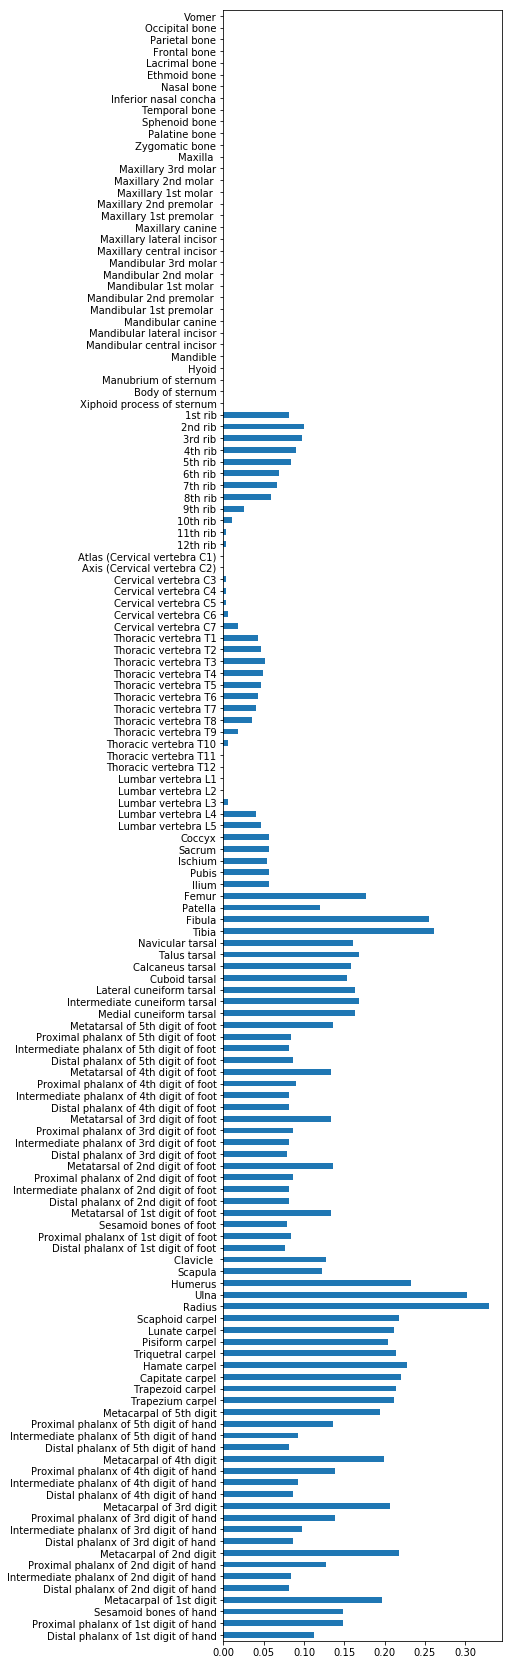

In [57]:
xray_labels.mean().plot.barh(figsize=(5, 30))

In [58]:
#Lets make a quick dictionary of humerus labels
x_ray = xray_labels['x-ray']
humerus = xray_labels['Humerus']
humerus_dictionary = {}
for i in range(len(x_ray)):
    humerus_dictionary.update({x_ray[i]:humerus[i]})
print(humerus_dictionary)

{'Ankle AP 1.png': 0, 'Ankle AP 10.png': 0, 'Ankle AP 11.png': 0, 'Ankle AP 12.png': 0, 'Ankle AP 13.png': 0, 'Ankle AP 14.png': 0, 'Ankle AP 15.png': 0, 'Ankle AP 16.png': 0, 'Ankle AP 17.png': 0, 'Ankle AP 18.png': 0, 'Ankle AP 19.png': 0, 'Ankle AP 2.png': 0, 'Ankle AP 20.png': 0, 'Ankle AP 21.png': 0, 'Ankle AP 22.png': 0, 'Ankle AP 23.png': 0, 'Ankle AP 3.png': 0, 'Ankle AP 4.png': 0, 'Ankle AP 5.png': 0, 'Ankle AP 6.png': 0, 'Ankle AP 7.png': 0, 'Ankle AP 8.png': 0, 'Ankle AP 9.png': 0, 'Ankle Lat 1.png': 0, 'Ankle Lat 10.png': 0, 'Ankle Lat 11.png': 0, 'Ankle Lat 12.png': 0, 'Ankle Lat 13.png': 0, 'Ankle Lat 14.png': 0, 'Ankle Lat 15.png': 0, 'Ankle Lat 16.png': 0, 'Ankle Lat 17.png': 0, 'Ankle Lat 18.png': 0, 'Ankle Lat 19.png': 0, 'Ankle Lat 2.png': 0, 'Ankle Lat 20.png': 0, 'Ankle Lat 21.png': 0, 'Ankle Lat 3.png': 0, 'Ankle Lat 4.png': 0, 'Ankle Lat 5.png': 0, 'Ankle Lat 6.png': 0, 'Ankle Lat 7.png': 0, 'Ankle Lat 8.png': 0, 'Ankle Lat 9.png': 0, 'Elbow 1.png': 1, 'Elbow 10.

Now we create a Train / Test split:

In [59]:
X = []
y = []
keys = list(image_dict.keys())
for key in keys:
    X.append(image_dict[key])
    y.append(humerus_dictionary[key])
#Life gets a little easier if X and y are np arrays (lets us change type of number)
X = np.array(X).astype('float32')
X = X / 255
y = np.array(y).astype('int')
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=7)
print("X train:", X_train)
print("X_test:", X_test)
print("y_train: ", y_train)
print("y_test: ", y_test)
print("X_train.shape: ", X_train.shape)
print("y_train.shape: ", y_train.shape)
X_train = X_train.reshape((-1, 256, 256, 1))
X_test = X_test.reshape((-1, 256, 256, 1))
print("X_train.shape: ", X_train.shape)
print("y_train.shape: ", y_train.shape)
print("y.shape: ", y.shape)
X = X.reshape((-1, 256, 256, 1))
print(X.shape)

X train: [[0.02745098 0.02745098 0.02352941 ... 0.02745098 0.02745098 0.02352941]
 [0.01568628 0.01568628 0.01568628 ... 0.01568628 0.01568628 0.01176471]
 [0.32156864 0.32156864 0.32156864 ... 0.22745098 0.22745098 0.22745098]
 ...
 [0.8039216  0.8039216  0.8039216  ... 0.8039216  0.8039216  0.8039216 ]
 [0.09411765 0.09411765 0.16078432 ... 0.3137255  0.3372549  0.3372549 ]
 [0.09803922 0.09803922 0.09803922 ... 0.02745098 0.02745098 0.02745098]]
X_test: [[0.01568628 0.01568628 0.01568628 ... 0.01568628 0.01568628 0.01960784]
 [0.73333335 0.38039216 0.17254902 ... 1.         0.99215686 0.9843137 ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 ...
 [0.08235294 0.08235294 0.08235294 ... 0.07843138 0.07843138 0.07843138]
 [0.14117648 0.1254902  0.1254902  ... 0.09803922 0.09803922 0.09803922]
 [0.         0.         0.         ... 0.6313726  0.6039216  0.63529414]]
y_train:  [0 0 0 0 1 1 0 0 0 1 0 1 0 1 0 0 1 0 1 0 0 0 1 0 0 1 0 0 0 0 1 0 0 0 0 0 0
 0 0 0 0 0

In [60]:
y = to_categorical(y)
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

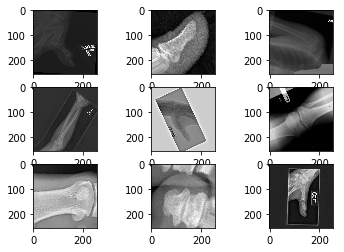

In [61]:
#Practice manipulating and printing images
datagen = ImageDataGenerator(rotation_range=180)
# fit parameters from data
datagen.fit(X_train)
# configure batch size and retrieve one batch of images
for X_batch, y_batch in datagen.flow(X_train, y_train, batch_size=9):
    # create a grid of 3x3 images
    for i in range(0, 9):
        plt.subplot(330 + 1 + i)
        plt.imshow(X_batch[i].reshape(256, 256), cmap=plt.get_cmap('gray'))
    # show the plot
    plt.show()
    break

In [62]:
#Lets run our model on non-augmented images
batch_size = 52
epochs = 4
num_classes = 1 #Number of possible bones as an output

In [67]:
#Build the model
bone_rec_model = Sequential()
bone_rec_model.add(Conv2D(128, kernel_size = (4, 4), input_shape=(256, 256, 1), strides = 2, activation = 'relu'))
bone_rec_model.add(LeakyReLU(alpha=0.1))
bone_rec_model.add(Conv2D(64, (3, 3)))
bone_rec_model.add(LeakyReLU(alpha=0.1))
bone_rec_model.add(MaxPooling2D(pool_size=(2, 2)))
bone_rec_model.add(Dropout(0.5))
bone_rec_model.add(Conv2D(32, (3, 3), padding='same'))
bone_rec_model.add(LeakyReLU(alpha=0.1))
bone_rec_model.add(Conv2D(16, (3, 3)))
bone_rec_model.add(LeakyReLU(alpha=0.1))
bone_rec_model.add(MaxPooling2D(pool_size=(2, 2)))
bone_rec_model.add(Dropout(0.5))
bone_rec_model.add(Flatten())
bone_rec_model.add(Dense(16))
bone_rec_model.add(LeakyReLU(alpha=0.1))
bone_rec_model.add(Dropout(0.5))
bone_rec_model.add(Flatten())
bone_rec_model.add(Dense(2, activation='softmax'))

In [91]:
#Compile the model - using BINARY CROSS ENTROPY
bone_rec_model.compile(loss=keras.losses.binary_crossentropy, optimizer=keras.optimizers.Adam(),metrics=['accuracy'])
bone_rec_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 127, 127, 128)     2176      
_________________________________________________________________
leaky_re_lu_5 (LeakyReLU)    (None, 127, 127, 128)     0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 125, 125, 64)      73792     
_________________________________________________________________
leaky_re_lu_6 (LeakyReLU)    (None, 125, 125, 64)      0         
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 62, 62, 64)        0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 62, 62, 64)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 62, 62, 32)        18464     
__________

In [145]:
tensorboard = TensorBoard(log_dir="logs/{}".format(time()))

In [146]:
#Train the model

bone_rec_train = bone_rec_model.fit(
    X,
    y,
    validation_split = 0.2,
    batch_size=batch_size,
    epochs=epochs,
    verbose=1,
    callbacks=[tensorboard]
)

Train on 312 samples, validate on 79 samples
Epoch 1/4
312/312 [==============================] - 39s 124ms/sample - loss: 0.4004 - acc: 0.8141 - val_loss: 0.4115 - val_acc: 0.7722
Epoch 2/4
312/312 [==============================] - 36s 115ms/sample - loss: 0.4181 - acc: 0.7885 - val_loss: 0.3957 - val_acc: 0.7722
Epoch 3/4
312/312 [==============================] - 38s 121ms/sample - loss: 0.3853 - acc: 0.8109 - val_loss: 0.3913 - val_acc: 0.7468
Epoch 4/4
312/312 [==============================] - 37s 117ms/sample - loss: 0.4065 - acc: 0.8045 - val_loss: 0.3980 - val_acc: 0.7722


Now we will try ImageDataGenerator - using flow from dataframe

In [93]:
a = list(np.arange(1000))
'[' + ', '.join(str(n) for n in a)  + ']'


'[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221

In [108]:
df.head()

,x-ray,Distal phalanx of 1st digit of hand,Proximal phalanx of 1st digit of hand,Sesamoid bones of hand,Metacarpal of 1st digit,Distal phalanx of 2nd digit of hand,Intermediate phalanx of 2nd digit of hand,Proximal phalanx of 2nd digit of hand,Metacarpal of 2nd digit,Distal phalanx of 3rd digit of hand,Intermediate phalanx of 3rd digit of hand,Proximal phalanx of 3rd digit of hand,Metacarpal of 3rd digit,Distal phalanx of 4th digit of hand,Intermediate phalanx of 4th digit of hand,Proximal phalanx of 4th digit of hand,Metacarpal of 4th digit,Distal phalanx of 5th digit of hand,Intermediate phalanx of 5th digit of hand,Proximal phalanx of 5th digit of hand,Metacarpal of 5th digit,Trapezium carpel,Trapezoid carpel,Capitate carpel,Hamate carpel,Triquetral carpel,Pisiform carpel,Lunate carpel,Scaphoid carpel,Radius,Ulna,Humerus,Scapula,Clavicle,Distal phalanx of 1st digit of foot,Proximal phalanx of 1st digit of foot,Sesamoid bones of foot,Metatarsal of 1st digit of foot,Distal phalanx of 2nd digit of foot,Intermediate phalanx of 2nd digit of foot,Proximal phalanx of 2nd digit of foot,Metatarsal of 2nd digit of foot,Distal phalanx of 3rd digit of foot,Intermediate phalanx of 3rd digit of foot,Proximal phalanx of 3rd digit of foot,Metatarsal of 3rd digit of foot,Distal phalanx of 4th digit of foot,Intermediate phalanx of 4th digit of foot,Proximal phalanx of 4th digit of foot,Metatarsal of 4th digit of foot,Distal phalanx of 5th digit of foot,Intermediate phalanx of 5th digit of foot,Proximal phalanx of 5th digit of foot,Metatarsal of 5th digit of foot,Medial cuneiform tarsal,Intermediate cuneiform tarsal,Lateral cuneiform tarsal,Cuboid tarsal,Calcaneus tarsal,Talus tarsal,Navicular tarsal,Tibia,Fibula,Patella,Femur,Ilium,Pubis,Ischium,Sacrum,Coccyx,Lumbar vertebra L5,Lumbar vertebra L4,Lumbar vertebra L3,Lumbar vertebra L2,Lumbar vertebra L1,Thoracic vertebra T12,Thoracic vertebra T11,Thoracic vertebra T10,Thoracic vertebra T9,Thoracic vertebra T8,Thoracic vertebra T7,Thoracic vertebra T6,Thoracic vertebra T5,Thoracic vertebra T4,Thoracic vertebra T3,Thoracic vertebra T2,Thoracic vertebra T1,Cervical vertebra C7,Cervical vertebra C6,Cervical vertebra C5,Cervical vertebra C4,Cervical vertebra C3,Axis (Cervical vertebra C2),Atlas (Cervical vertebra C1),12th rib,11th rib,10th rib,9th rib,8th rib,7th rib,6th rib,5th rib,4th rib,3rd rib,2nd rib,1st rib,Xiphoid process of sternum,Body of sternum,Manubrium of sternum,Hyoid,Mandible,Mandibular central incisor,Mandibular lateral incisor,Mandibular canine,Mandibular 1st premolar,Mandibular 2nd premolar,Mandibular 1st molar,Mandibular 2nd molar,Mandibular 3rd molar,Maxillary central incisor,Maxillary lateral incisor,Maxillary canine,Maxillary 1st premolar,Maxillary 2nd premolar,Maxillary 1st molar,Maxillary 2nd molar,Maxillary 3rd molar,Maxilla,Zygomatic bone,Palatine bone,Sphenoid bone,Temporal bone,Inferior nasal concha,Nasal bone,Ethmoid bone,Lacrimal bone,Frontal bone,Parietal bone,Occipital bone,Vomer
0,Ankle AP 1.png,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0.0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,Ankle AP 10.png,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0.0,1,0,0,0,1,1,1,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,Ankle AP 11.png,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,1,0,0,1,1,0,0,1.0,1,0,0,0,1,1,1,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,Ankle AP 12.png,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0

In [114]:
humerus = df.copy()[['x-ray', 'Humerus']]
humerus['Humerus'] = humerus['Humerus'].astype(str)
humerus

,x-ray,Humerus
0,Ankle AP 1.png,0
1,Ankle AP 10.png,0
2,Ankle AP 11.png,0
3,Ankle AP 12.png,0
4,Ankle AP 13.png,0
5,Ankle AP 14.png,0
6,Ankle AP 15.png,0
7,Ankle AP 16.png,0
8,Ankle AP 17.png,0
9,Ankle AP 18.png,0


In [132]:
df=pd.read_csv('data/y_labels_binary.csv')
datagen=ImageDataGenerator(validation_split = 0.2, horizontal_flip = True, rotation_range = 360)#(rescale=1./255)
train_generator=datagen.flow_from_dataframe(
    dataframe=humerus,
    subset='training',
    directory='data/processed_pics',
    x_col="x-ray",
    y_col="Humerus",
    class_mode="binary",
    target_size=(256,256),
    batch_size=100,
    color_mode = 'grayscale'
)
valid_generator=datagen.flow_from_dataframe(
    dataframe=humerus,
    subset='validation',
    directory='data/processed_pics',
    x_col="x-ray",
    y_col="Humerus",
    class_mode="binary",
    target_size=(256,256),
    batch_size=batch_size,
    color_mode = 'grayscale',
    save_to_dir = 'data/generated',
)

#build the new model
bone_rec_model_aug = Sequential()
bone_rec_model_aug.add(Conv2D(128, kernel_size = (4, 4), input_shape=(256, 256, 1), strides = 2, activation = 'relu'))
bone_rec_model_aug.add(LeakyReLU(alpha=0.1))
bone_rec_model_aug.add(Conv2D(64, (3, 3)))
bone_rec_model_aug.add(LeakyReLU(alpha=0.1))
bone_rec_model_aug.add(MaxPooling2D(pool_size=(2, 2)))
bone_rec_model_aug.add(Dropout(0.5))
bone_rec_model_aug.add(Conv2D(32, (3, 3), padding='same'))
bone_rec_model_aug.add(LeakyReLU(alpha=0.1))
bone_rec_model_aug.add(Conv2D(16, (3, 3)))
bone_rec_model_aug.add(LeakyReLU(alpha=0.1))
bone_rec_model_aug.add(MaxPooling2D(pool_size=(2, 2)))
bone_rec_model_aug.add(Dropout(0.5))
bone_rec_model_aug.add(Flatten())
bone_rec_model_aug.add(Dense(16))
bone_rec_model_aug.add(LeakyReLU(alpha=0.1))
bone_rec_model_aug.add(Dropout(0.5))
bone_rec_model_aug.add(Flatten())
bone_rec_model_aug.add(Dense(1, activation='softmax'))

#Compile the model
bone_rec_model_aug.compile(loss=keras.losses.binary_crossentropy, optimizer=keras.optimizers.Adam(),metrics=['accuracy'])

STEP_SIZE_TRAIN=0.8*len(df)//batch_size
print(STEP_SIZE_TRAIN)
STEP_SIZE_VALID=0.2*len(df)//batch_size
print(STEP_SIZE_VALID)
bone_rec_model_aug.fit_generator(generator=train_generator,
                    steps_per_epoch=STEP_SIZE_TRAIN,
                    validation_data=valid_generator,
                    validation_steps=STEP_SIZE_VALID,
                    epochs=epochs)

Found 313 images belonging to 2 classes.
Found 78 images belonging to 2 classes.
6.0
1.0
Epoch 1/4
4/4 [==============================] - 40s 10s/step - loss: 12.0987 - acc: 0.2109 - val_loss: 10.8837 - val_acc: 0.3205
Epoch 2/4
4/4 [==============================] - 39s 10s/step - loss: 12.3121 - acc: 0.2109 - val_loss: 10.8837 - val_acc: 0.3205
Epoch 3/4
4/4 [==============================] - 38s 9s/step - loss: 12.9523 - acc: 0.2109 - val_loss: 10.7305 - val_acc: 0.3205
Epoch 4/4
4/4 [==============================] - 41s 10s/step - loss: 12.5255 - acc: 0.2109 - val_loss: 10.7305 - val_acc: 0.3205
